# Model 49 - (XGBOOST - some in kernels)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
%matplotlib inline

In [18]:
fi = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}'):
        if 'fi' in f and 'M049' in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/{f}')
            fi = pd.concat([fi, df])

M049_0719_2005_1JHN_fi_0.2565MAE_-1.361LMAE_xgboost_3folds_100000iter_0.005lr.parquet
M049_0719_1907_1JHN_fi_0.2566MAE_-1.36LMAE_xgboost_3folds_100000iter_0.01lr.parquet
M049_0719_1817_2JHH_fi_0.1159MAE_-2.155LMAE_xgboost_3folds_100000iter_0.1lr.parquet
M049_0719_1622_3JHN_fi_0.1158MAE_-2.156LMAE_xgboost_3folds_10000iter_0.1lr.parquet


In [19]:
use_feats = pd.DataFrame()
for i, d in fi.groupby('type'):
    print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats[i] = d2['importance'] > 0.001

1JHN
2JHH
3JHN


In [20]:
# use_feats.to_csv('../fi/Good_Features_By_Type.csv')

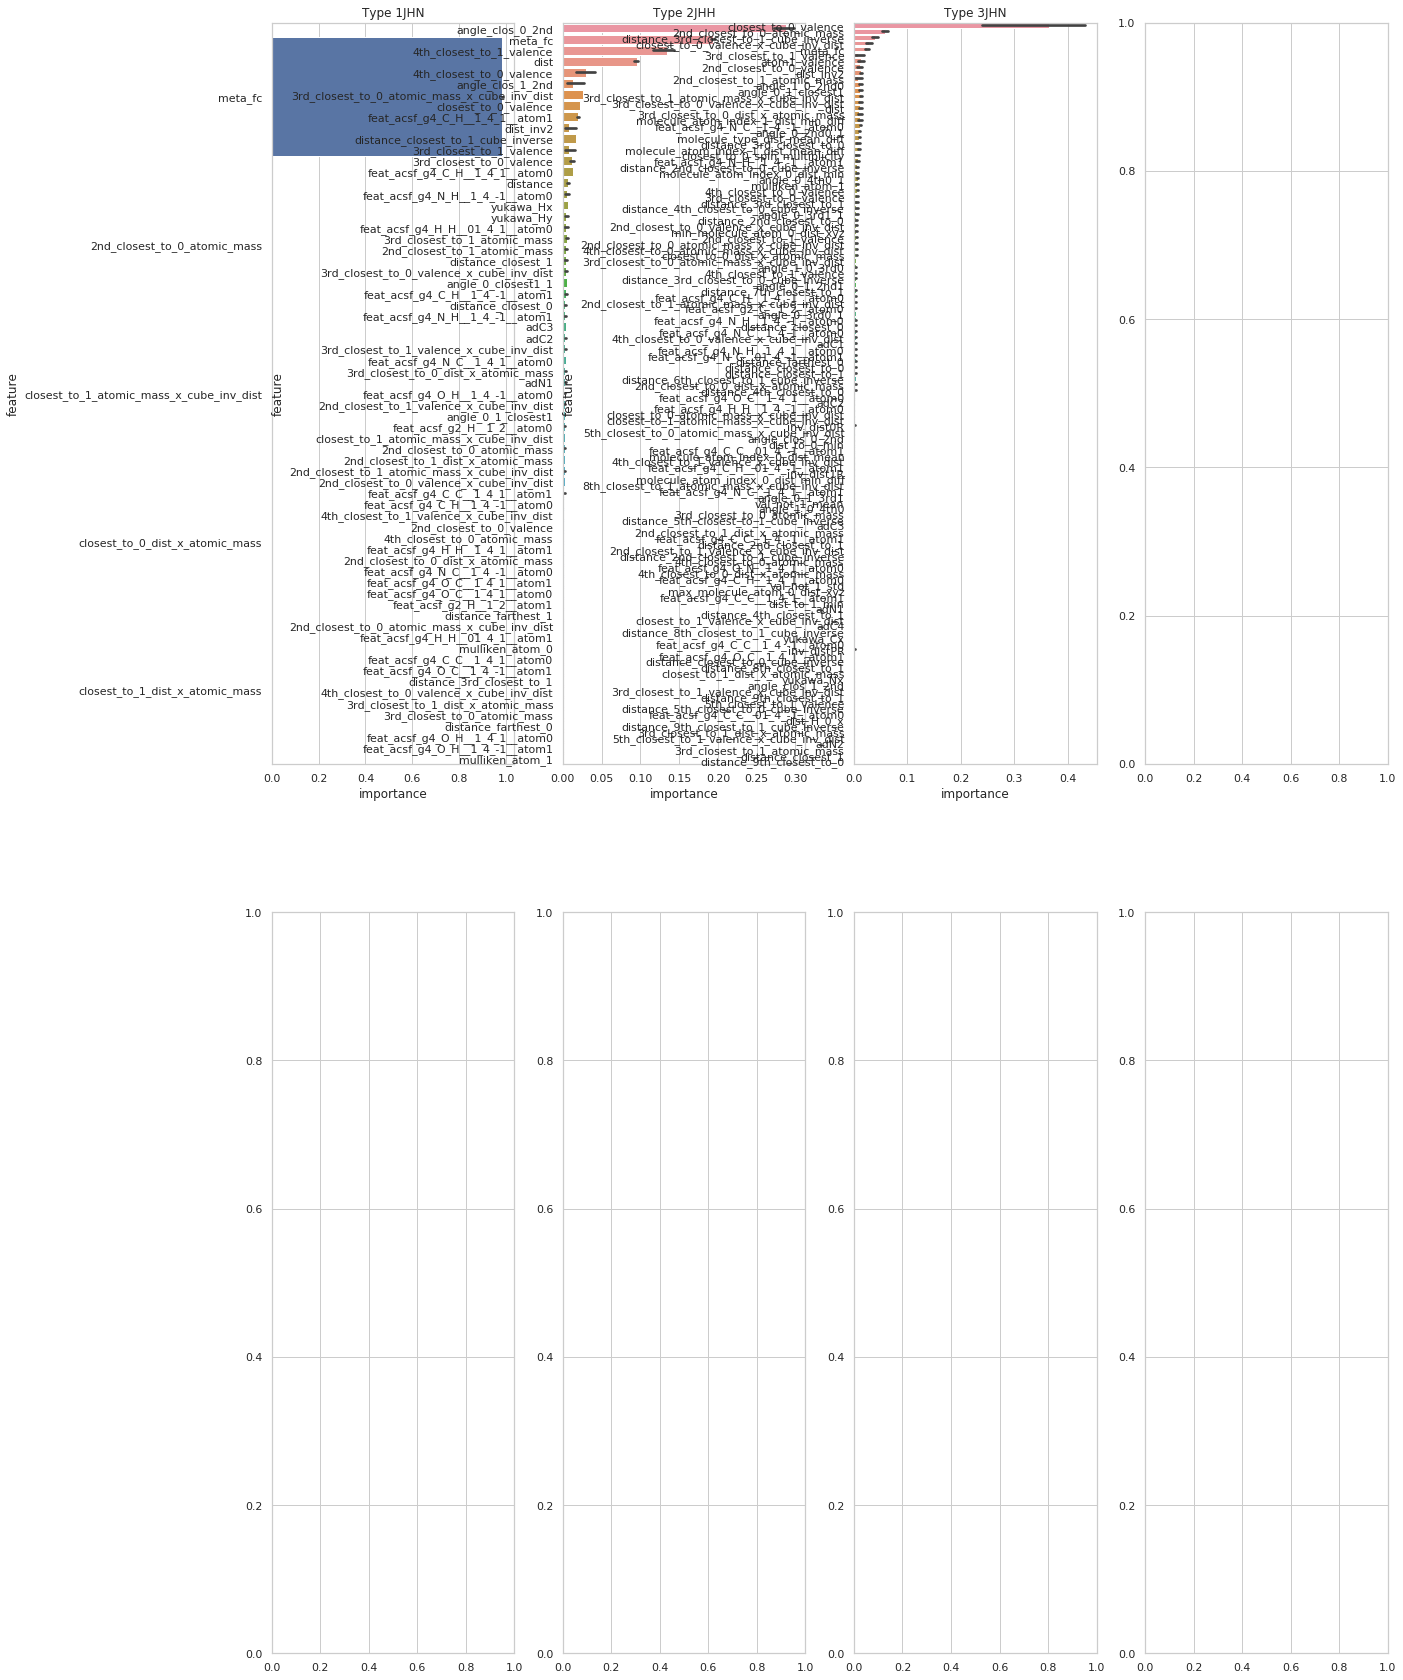

In [21]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 30))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
ax_idx = 0
for t in use_feats.columns.tolist():
    fi_t = fi.loc[fi['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.001]
    #plt.figure(figsize=(12, 20))
    sns.barplot(x='importance',
                y='feature',
                data=fi_t.sort_values('importance',
                                    ascending=False),
               ax=axes[ax_idx])
    axes[ax_idx].set_title(f'Type {t}')
    ax_idx += 1
plt.show()

# Meta Feature Importance

In [9]:
fi_meta = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}/meta/'):
        if 'fi' in f and 'M049' in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/meta/{f}')
            fi_meta = pd.concat([fi_meta, df])

M049_0719_2005_1JHN_fi_meta_fc_f2_0.3722MAE_-0.9884LMAE.parquet
M049_0719_1907_1JHN_fi_meta_fc_f3_0.3690MAE_-0.9969LMAE.parquet
M049_0719_1907_1JHN_fi_meta_fc_f2_0.3725MAE_-0.9876LMAE.parquet
M049_0719_2005_1JHN_fi_meta_fc_f1_0.3701MAE_-0.9940LMAE.parquet
M049_0719_2005_1JHN_fi_meta_fc_f3_0.3692MAE_-0.9965LMAE.parquet
M049_0719_1907_1JHN_fi_meta_fc_f1_0.3712MAE_-0.9910LMAE.parquet
M049_0719_1817_2JHH_fi_meta_fc_f2_0.1649MAE_-1.8026LMAE.parquet
M049_0719_1817_2JHH_fi_meta_fc_f3_0.1643MAE_-1.8061LMAE.parquet
M049_0719_1817_2JHH_fi_meta_fc_f1_0.1640MAE_-1.8078LMAE.parquet
M049_0719_1622_3JHN_fi_meta_fc_f3_0.1523MAE_-1.8818LMAE.parquet
M049_0719_1622_3JHN_fi_meta_fc_f1_0.1525MAE_-1.8805LMAE.parquet
M049_0719_1622_3JHN_fi_meta_fc_f2_0.1510MAE_-1.8905LMAE.parquet


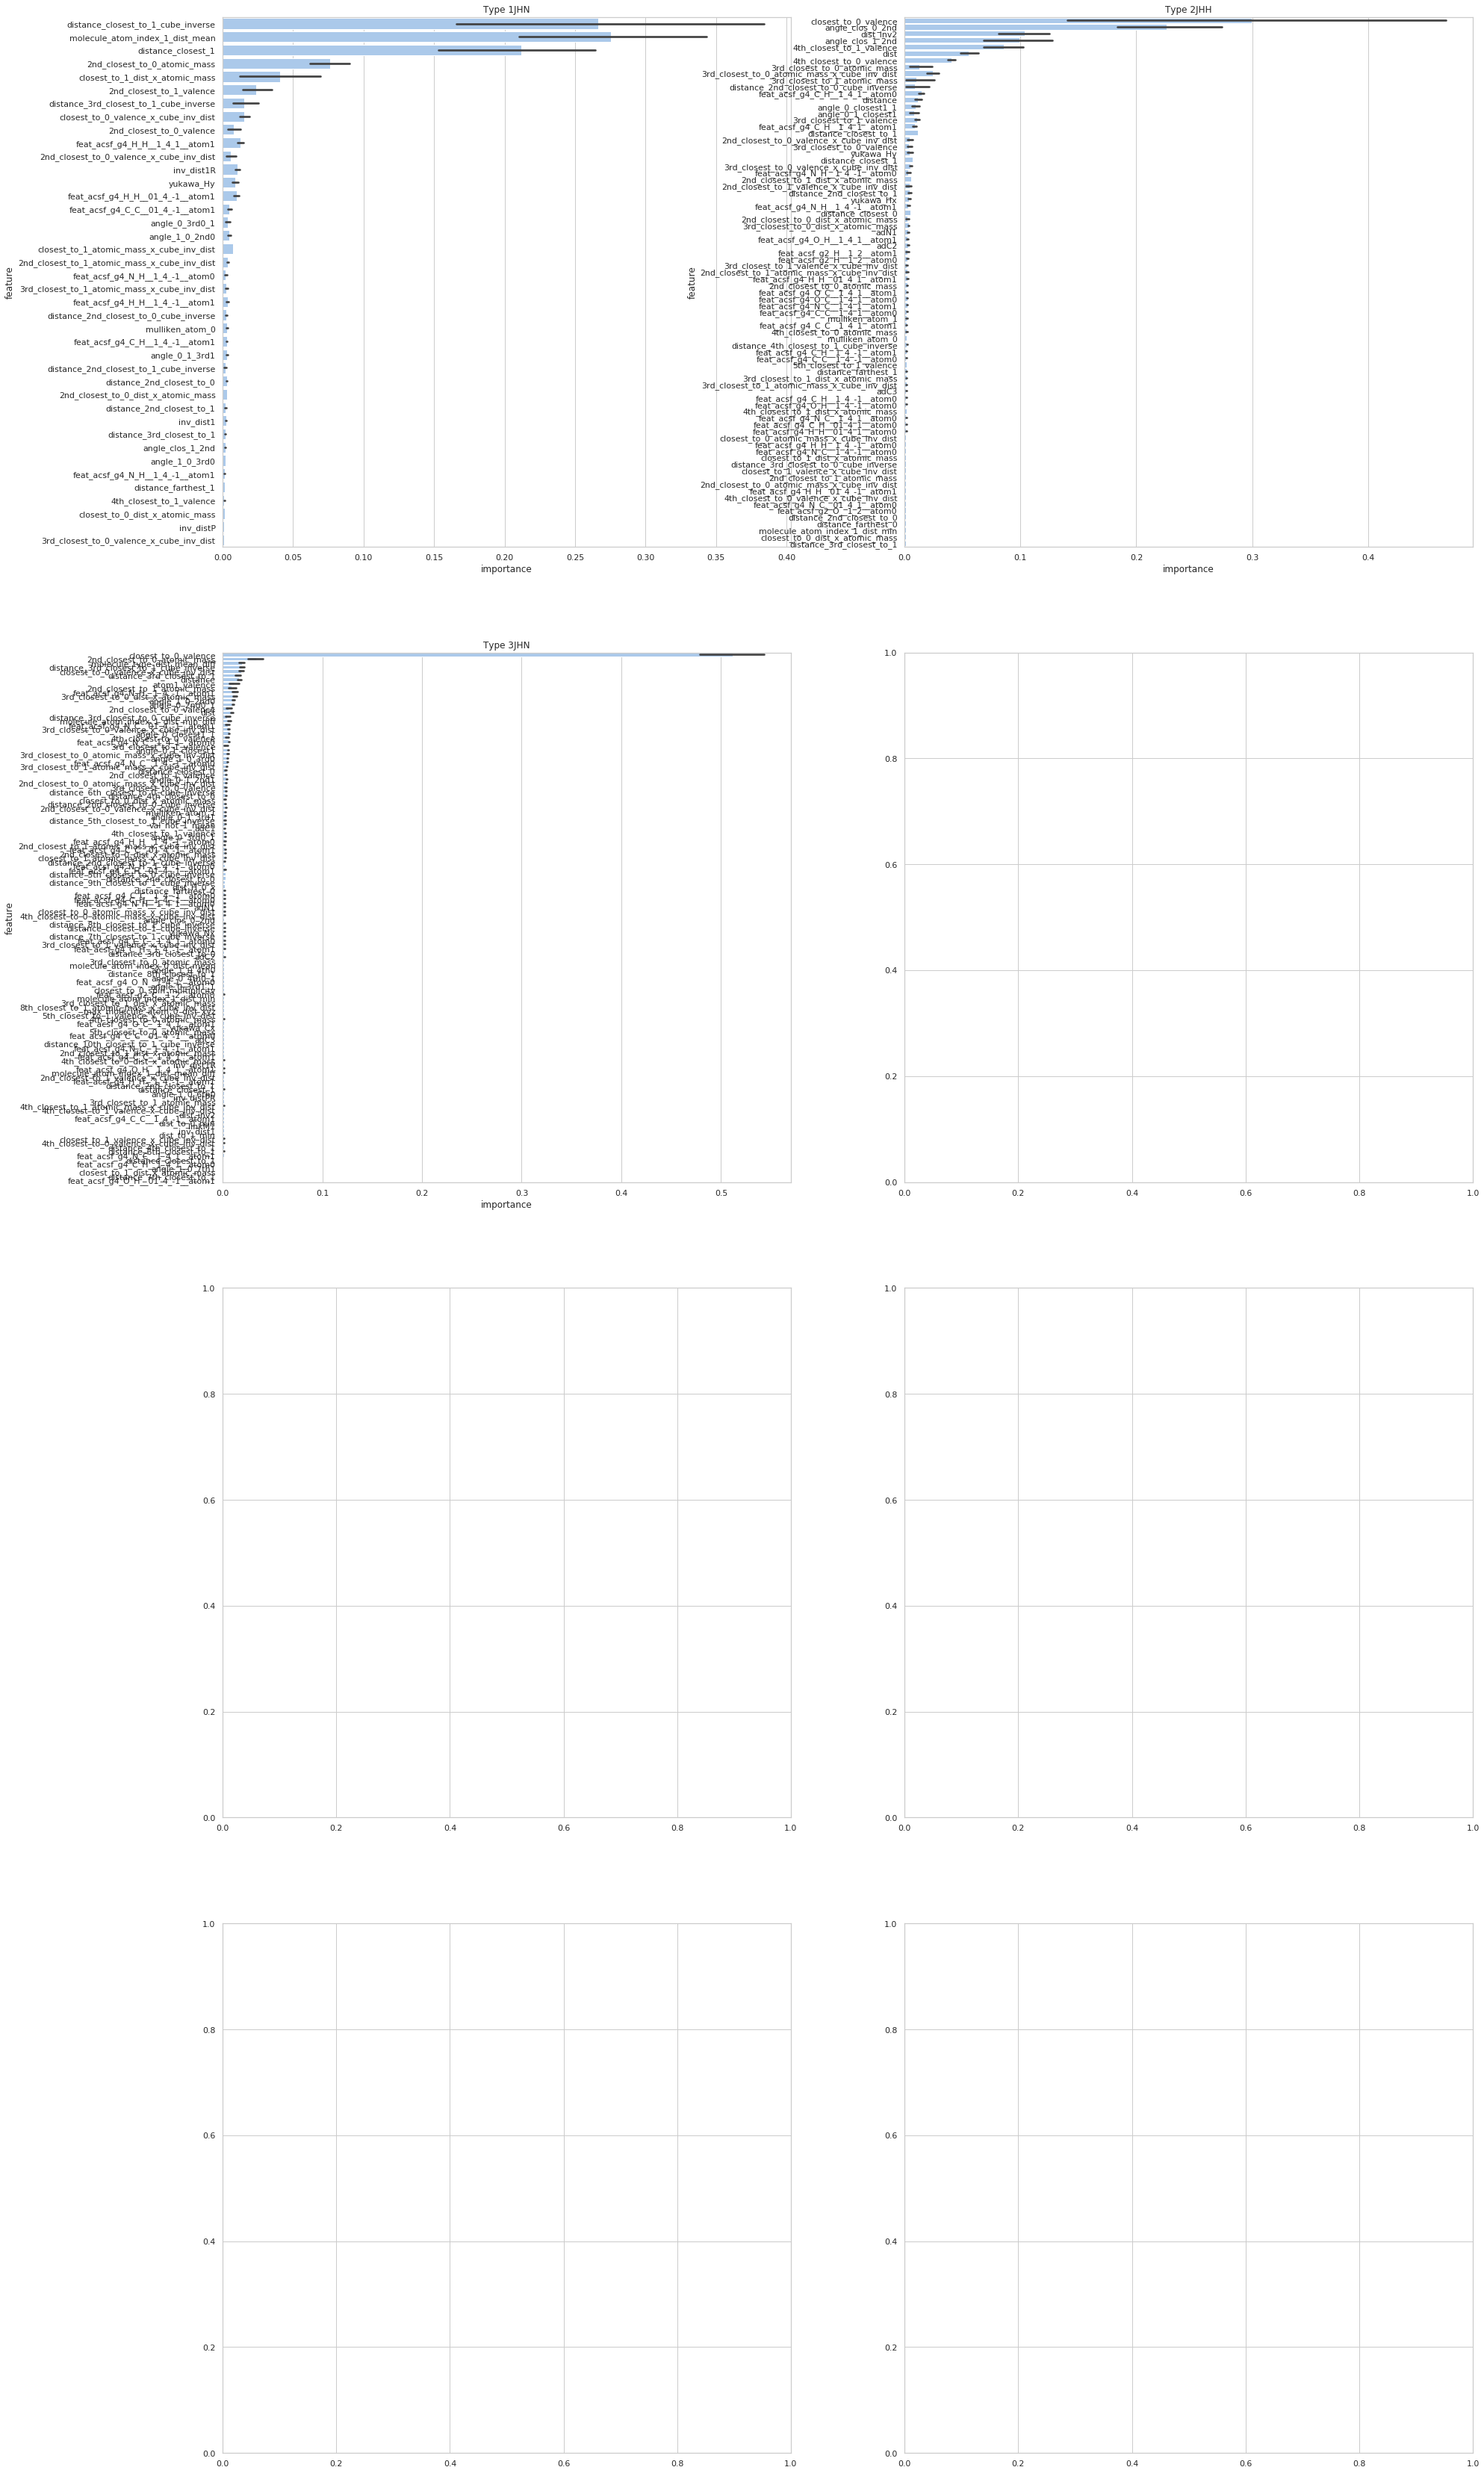

In [16]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(30, 60))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
ax_idx = 0
for t in use_feats.columns.tolist():
    fi_t = fi_meta.loc[fi_meta['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.001]
    #plt.figure(figsize=(12, 20))
    sns.barplot(x='importance',
                y='feature',
                data=fi_t.sort_values('importance',
                                    ascending=False),
                color="b",
                ax=axes[ax_idx])
    axes[ax_idx].set_title(f'Type {t}')
    ax_idx += 1
plt.show()

In [43]:
use_feats_meta = pd.DataFrame()
for i, d in fi_meta.groupby('type'):
    print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats_meta[i] = d2['importance'] > 0.001

1JHC
1JHN
2JHH
2JHN
3JHH
3JHN


In [44]:
use_feats_meta.sum()

1JHC    371.0
1JHN    369.0
2JHH    355.0
2JHN    365.0
3JHH    355.0
3JHN    367.0
dtype: float64

In [21]:
use_feats_meta.shape

(383, 4)

In [22]:
use_feats.sum()

1JHN    368.0
2JHH    349.0
3JHN    367.0
dtype: float64

In [35]:
use_feats_meta.loc[use_feats_meta['3JHN'] == True].index.tolist()

['10th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '10th_closest_to_0_valence_x_cube_inv_dist',
 '10th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '10th_closest_to_1_valence_x_cube_inv_dist',
 '12th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '12th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '13th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '14th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_0_atomic_mass',
 '2nd_closest_to_0_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_0_dist_x_atomic_mass',
 '2nd_closest_to_0_valence',
 '2nd_closest_to_0_valence_x_cube_inv_dist',
 '2nd_closest_to_1_atomic_mass',
 '2nd_closest_to_1_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_1_dist_x_atomic_mass',
 '2nd_closest_to_1_valence',
 '2nd_closest_to_1_valence_x_cube_inv_dist',
 '3rd_closest_to_0_atomic_mass',
 '3rd_closest_to_0_atomic_mass_x_cube_inv_dist',
 '3rd_closest_to_0_dist_x_atomic_mass',
 '3rd_closest_to_0_valence',
 '3rd_closest_to_0_valence_x_cube_inv_dist',
 '3rd_closest_to_1_a